In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.MLReady.csv files!!!

In [46]:
df=pd.read_csv("../../data/FM_Acq_Perf_FMAC_EPOCH2_ML.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,numBorrowers,...,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,1133339,1133339,100209956357,2,5.125,348000,2009-02-01,2009-04-01,87.0,1.0,...,5.04,5.13,0.041667,2.87,-0.125,-0.085,-0.005,-0.023810,-0.016865,-0.000975
1,1133340,1133340,100392775700,3,4.625,195000,2009-02-01,2009-04-01,52.0,2.0,...,5.04,5.13,0.041667,2.87,-0.625,0.415,-0.505,-0.119048,0.082341,-0.098441
2,1133341,1133341,100621428854,2,4.875,342000,2009-02-01,2009-04-01,80.0,1.0,...,5.04,5.13,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708
3,1133342,1133342,100720959726,1,5.375,93000,2009-02-01,2009-05-01,70.0,1.0,...,5.04,5.13,0.041667,2.87,0.125,-0.335,0.245,0.023810,-0.066468,0.047758
4,1133343,1133343,100783704799,1,4.875,182000,2009-02-01,2009-04-01,76.0,2.0,...,5.04,5.13,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 60 columns):
Unnamed: 0                    119696 non-null int64
Unnamed: 0.1                  119696 non-null int64
id                            119696 non-null int64
origChannel                   119696 non-null int64
origIntRate                   119696 non-null float64
origUPB                       119696 non-null int64
origDate                      119696 non-null object
firstPmtDate                  119696 non-null object
origLTV                       119696 non-null float64
numBorrowers                  119696 non-null float64
origDebtIncRatio              119696 non-null float64
borrCreditScore               119696 non-null float64
loanPurp                      119696 non-null int64
zipCode                       119696 non-null int64
pMIperct                      119696 non-null float64
mortInsType                   119696 non-null float64
bestCreditScore               119696 non-

## Remove columns not involved in 'Foreclosure or Not' query

In [48]:
df.drop(['Unnamed: 0','Unnamed: 0.1','id','firstPmtDate','rptPeriod','currIntRate','currUPB','loanAge','monMatur',\
         'zeroBalDate','lastPdInstDate','forecloDate','dispDate','forecloCost','propRepCost','recovCosts',\
         'miscCost','holdTaxCost','saleProceed','credEnhProceed','repurchProceed','otherForecloProceed',\
         'nonIntUPB','prinForgivBal','repurchMakeWholeProceedFlg','forecloPrinWriteOffAmnt','servActivIndicator',\
         'deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 30 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origDate              119696 non-null object
origLTV               119696 non-null float64
numBorrowers          119696 non-null float64
origDebtIncRatio      119696 non-null float64
borrCreditScore       119696 non-null float64
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null float64
bestCreditScore       119696 non-null float64
worstCreditScore      119696 non-null float64
avgCreditScore        119696 non-null float64
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null float64
fmacRateMax           119696 n

## Engineer originDate into Date features

In [50]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [51]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [52]:
df.drop(['origDate'],1,inplace=True)

In [53]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2009,2
1,2009,2
2,2009,2
3,2009,2
4,2009,2


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [54]:
df.zeroBalCode.unique()

array([ 9.,  1.,  3., 16.,  6.,  2., 15.])

In [55]:
df['zeroBalCode'] = df.zeroBalCode.replace(1,0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,16,6,2,15],1)

In [56]:
df.zeroBalCode.unique()

array([1., 0.])

In [57]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null float64
numBorrowers          119696 non-null float64
origDebtIncRatio      119696 non-null float64
borrCreditScore       119696 non-null float64
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null float64
bestCreditScore       119696 non-null float64
worstCreditScore      119696 non-null float64
avgCreditScore        119696 non-null float64
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null float64
fmacRateMax           119696 non-null float64
fmacRateMin           119696 

# Review values for dates and slice (if needed) the timeframe you want

In [58]:
df.origYear.unique()

array([2009, 2010, 2011, 2012, 2013], dtype=int64)

In [59]:
df['origMonth'].unique()

array([ 2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

# Coerce the column dtype (int in this case)

In [60]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int32
numBorrowers          119696 non-null int32
origDebtIncRatio      119696 non-null int32
borrCreditScore       119696 non-null int32
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int32
bestCreditScore       119696 non-null int32
worstCreditScore      119696 non-null int32
avgCreditScore        119696 non-null int32
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null object
fmacRateMax           119696 non-null float64
fmacRateMin           119696 non-null float64


In [62]:
#df.to_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

# Review metrics last time before run (to have record of starting values)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int32
numBorrowers          119696 non-null int32
origDebtIncRatio      119696 non-null int32
borrCreditScore       119696 non-null int32
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int32
bestCreditScore       119696 non-null int32
worstCreditScore      119696 non-null int32
avgCreditScore        119696 non-null int32
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null object
fmacRateMax           119696 non-null float64
fmacRateMin           119696 non-null float64


In [64]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,...,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,2,5.125,348000,87,1,50,689,2,51,25.0,...,0.041667,2.87,-0.125,-0.085,-0.005,-0.023810,-0.016865,-0.000975,2009,2
1,3,4.625,195000,52,2,54,703,1,82,0.0,...,0.041667,2.87,-0.625,0.415,-0.505,-0.119048,0.082341,-0.098441,2009,2
2,2,4.875,342000,80,1,54,746,1,981,0.0,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2
3,1,5.375,93000,70,1,50,780,1,496,0.0,...,0.041667,2.87,0.125,-0.335,0.245,0.023810,-0.066468,0.047758,2009,2
4,1,4.875,182000,76,2,22,802,1,18,0.0,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2


# Pycaret - Setup with categorical definition

### Use feature engineering, polynomial features, trig feats, PCA

In [65]:
# models=setup(df, target = 'rateDiffPct',
#              feature_interaction=True, feature_ratio=True,
#              polynomial_features=True, pca=True, pca_components=10,
#             numeric_features = ['origUPB','origLTV','numBorrowers','origDebtIncRatio',\
#                                'avgCreditScore'],
#             ignore_features = ['origIntRate','rank','deal'])

### Use feature engineering, polynomial features, trig feats

In [66]:
models=setup(df, target = 'zeroBalCode', categorical_features = ['numBorrowers', 'mortInsType'],
            numeric_features = ['origLTV', 'origDebtIncRatio', 'borrCreditScore', 'bestCreditScore', 'worstCreditScore',
                               'avgCreditScore'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5141
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(119696, 31)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with blacklist exclusions

In [67]:
model_results=compare_models()
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8642,0.7822,0.0933,0.5102,0.1576,0.1206
1,Gradient Boosting Classifier,0.8639,0.785,0.0626,0.5021,0.1111,0.0836
2,Ridge Classifier,0.8638,0,0,0,0,0
3,Logistic Regression,0.8636,0.7333,0.0083,0.4723,0.0163,0.0117
4,Extreme Gradient Boosting,0.8632,0.784,0.0381,0.4648,0.0701,0.051
5,Linear Discriminant Analysis,0.8627,0.7546,0.032,0.4398,0.0592,0.0419
6,Light Gradient Boosting Machine,0.8625,0.7763,0.0845,0.4732,0.1431,0.1064
7,Extra Trees Classifier,0.8623,0.7178,0.0359,0.445,0.0662,0.0466
8,Ada Boost Classifier,0.8616,0.7711,0.085,0.4639,0.1432,0.105
9,Random Forest Classifier,0.8615,0.6867,0.064,0.4479,0.1116,0.08


## Create models - store in variable

In [68]:
cat = create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8652,0.7836,0.0965,0.5238,0.1630,0.1260
1,0.8723,0.7782,0.1228,0.6667,0.2074,0.1724
2,0.8640,0.7785,0.0965,0.5000,0.1618,0.1232
3,0.8640,0.7733,0.0877,0.5000,0.1493,0.1132
4,0.8622,0.7914,0.0830,0.4750,0.1413,0.1049
5,0.8622,0.7732,0.0742,0.4722,0.1283,0.0947
6,0.8634,0.7674,0.0873,0.5000,0.1487,0.1126
7,0.8603,0.7772,0.0965,0.4400,0.1583,0.1149
8,0.8615,0.7769,0.0833,0.4524,0.1407,0.1027
9,0.8675,0.8219,0.1053,0.5714,0.1778,0.1414


## Tune Models

In [69]:
tuned_cat = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8640,0.7487,0.0,0.0,0.0,0.0
1,0.8640,0.7316,0.0,0.0,0.0,0.0
2,0.8640,0.7361,0.0,0.0,0.0,0.0
3,0.8640,0.7396,0.0,0.0,0.0,0.0
4,0.8634,0.7630,0.0,0.0,0.0,0.0
5,0.8634,0.7369,0.0,0.0,0.0,0.0
6,0.8634,0.7300,0.0,0.0,0.0,0.0
7,0.8639,0.7343,0.0,0.0,0.0,0.0
8,0.8639,0.7347,0.0,0.0,0.0,0.0
9,0.8639,0.7930,0.0,0.0,0.0,0.0


## Ensemble models

In [70]:
cat_bagged = ensemble_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8693,0.7893,0.0921,0.6364,0.1609,0.1310
1,0.8711,0.7778,0.1053,0.6667,0.1818,0.1503
2,0.8646,0.7790,0.0658,0.5172,0.1167,0.0888
3,0.8604,0.7700,0.0570,0.4062,0.1000,0.0688
4,0.8616,0.7916,0.0393,0.4286,0.0720,0.0502
5,0.8622,0.7780,0.0524,0.4615,0.0941,0.0682
6,0.8616,0.7631,0.0611,0.4516,0.1077,0.0776
7,0.8591,0.7765,0.0482,0.3667,0.0853,0.0554
8,0.8651,0.7774,0.0702,0.5333,0.1240,0.0954
9,0.8704,0.8326,0.0921,0.6774,0.1622,0.1339


## Evaluate Models

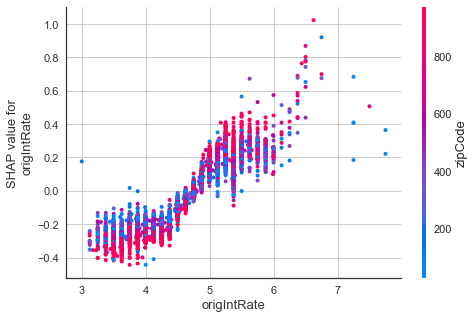

In [72]:
interpret_model(estimator=cat, plot='correlation')

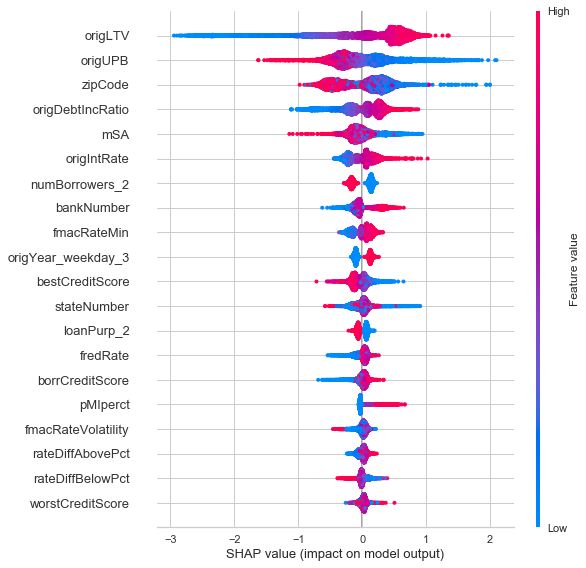

In [73]:
interpret_model(estimator=cat, plot='summary')